<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Torres Montaquiza, Jhanina Nicole** <--- CAMBIE POR LOS QUE CORRESPONDA A SUS DATOS

**18-02-2021**

<font color='red'>NO AGREGUE NUEVAS CELDAS, UTILICE ÚNICAMENTE LAS QUE ESTÁN CREADAS</font>


### REQUERIMIENTOS PARA EL EXAMEN
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dos funciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [3]:
def download_pubmed (keyword):
    """
    Función que pide como input una variable tipo str y retorna una variable tipo lista de los id de la 
    busqueda realizada
    """
    from Bio import Entrez
    from Bio import SeqIO
    from Bio import GenBank 
    Entrez.email = 'jhanito10@gmail.com' ## se realiza la busqueda en la base de datos de pubmed y se utiliza el termino Ecuador Genomics 
    handle = Entrez.esearch(db='pubmed',
                        sort='relevance',
                        retmax='1000',
                        retmode='xml',
                        term=keyword)
    resultado = Entrez.read(handle)
    id_lista = resultado["IdList"] ## se obtiene el "IdList" de la busqueda realizada 
    ids = ','.join(id_lista) ## se une todos los ids 
    Entrez.email = 'jhanito10@gmail.com'
    handle = Entrez.efetch(db='pubmed',
                       retmode='xml',
                       id=ids)
    id_final = ids.split(",") ## se crea una lista de los ids 
    return (id_final) 

##mining_pubs 
import csv 
import re
import pandas as pd 
from collections import Counter

def mining_pubs(tipo):
    """
    Función que pide como input un parametro tipo str que pude ser "DP", "AU" y "AD" y como output un data frame 
    """
    with open("pubmed-EcuadorGen-set.txt", errors="ignore") as f: 
        texto = f.read() 
    if tipo == "DP":
        ## DF de PMID y año de publicación
        PMID = re.findall("PMID- (\d*)", texto) ## se utiliza la función re.findall para extraer a los PMID 
        año = re.findall("DP\s{2}-\s(\d{4})", texto)## se utiliza la función re.findall para extraer a los años  
        PMID_año = pd.DataFrame()
        PMID_año["PMID"] = PMID
        PMID_año ["Año de publicación"] = año
        return (pmid_year)
    ## DF de PMID y año de publicación 
    elif tipo == "AU": 
        PMID = re.findall("PMID- (\d*)", texto) ##se utiliza la función re.findall para extraer a los PMID 
        autores = texto.split("PMID- ")
        autores.pop(0)
        num_autores = []
        for i in range(len(autores)):
            numero = re.findall("AU -", autores[i]) ## se utiliza la función re.findall para extraer al numero de autores 
            n = (len(numero))
            num_autores.append(n)
        PMID_autor = pd.DataFrame()
        PMID_autor["PMID"] = PMID 
        PMID_autor["Numero de autores"] = num_autores
        return (PMID_autor)
    elif tipo == "AD": 
        texto = re.sub(r"Av\.","", texto)
        AD = texto.split("AD  - ")
        n_paises = []
        for i in range(len(AD)): 
            pais = re.findall("\S, ([A-Za-z]*)\.", AD[i]) ##se utiliza la función re.findall para extraer a los autores con etiqueta AD 
            if not pais == []: 
                if not len(pais) >= 2:  
                    if re.findall("^[A-Z]", pais[0]): 
                        n_paises.append(pais[0])
        conteo=Counter(n_paises)
        resultado = {}
        for clave in conteo:
            valor = conteo[clave]
            if valor != 1: 
                resultado[clave] = valor 
        veces_pais = pd.DataFrame()
        veces_pais["pais"] = resultado.keys()
        veces_pais["numero de autores"] = resultado.values()
        return (veces_pais)



## Ejercicio 2 [1 punto]


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador genomics``` e imprima lo siguiente: 

```python
'El número de artículos es: xx' # xx corresponde al número de artículos recuperados

'El PMID del primer artículo es: xxxxxxxx' # xxxxxxxx corresponde al ID del artículo en PUDMED

```

In [4]:
articulos = download_pubmed("Ecuador Genomics")

print ("El numero de articulos es:", len(articulos)) 

print ("El PMID del primer articulo es:", articulos[0])

El numero de articulos es: 193
El PMID del primer articulo es: 31822297


## Ejercicio 3 [1 punto]

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [1]:
import miningscience as msc
pub_year = msc.mining_pubs("DP")
print (pub_year.iloc[0:2]) ##Se utiliza la función iloc para indicar la posicion que queremos extraer del data frame 
print (pub_year.iloc[826:])
pub_authors = msc.mining_pubs("AU")
print (pub_authors.iloc[0:2])
print (pub_authors.iloc[826:])
countries = msc.mining_pubs("AD")
print (countries.iloc[0:2])
print (countries.iloc[112:])
print(pub_year)

       PMID Año de publicación
0  19844075               2010
1  31822297               2019
         PMID Año de publicación
826  27429642               2016
827  31891233               2020
       PMID  Numero de autores
0  19844075                  2
1  31822297                  3
         PMID  Numero de autores
826  27429642                173
827  31891233                728
      pais  numero de autores
0  Ecuador               1157
1  Belgium                 86
        pais  numero de autores
112  Belarus                  2
113   Brunei                  2
114  Lebanon                  2
115   Zambia                  2
116   Jordan                  2
117   Latvia                  2
118  Vietnam                  3
119      Tas                  2
120    Korea                  2
121      Vic                  2
         PMID Año de publicación
0    19844075               2010
1    31822297               2019
2    29632024               2018
3    32623267               2020
4    2757

## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


Mean es:  2014.87077294686
Standard desviation is:  6.804327940706886


Text(0, 0.5, 'Frecuencia')

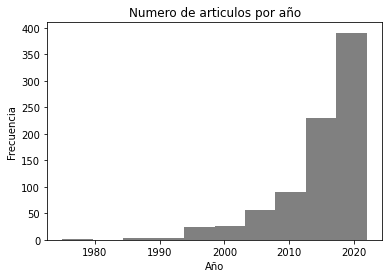

In [5]:
import pandas as pd 
import matplotlib.pyplot as plot
from collections import Counter
pub_year["Año de publicación"] = pub_year["Año de publicación"].astype("int")
mean_py = pub_year["Año de publicación"].mean() ##utiliza la funcion mean para obtener el promedio 
sd_py = pub_year["Año de publicación"].std() ##utiliza la funcion std para obtener la desviaciòn estandar 
print ("Mean es: ", mean_py)
print ("Standard desviation is: ", sd_py)
#print (pub_year["Año de publicación"])
intervalos = range(min(pub_year["Año de publicación"]), max(pub_year["Año de publicación"]))
plot.hist(x=pub_year["Año de publicación"], color = "gray")
plot.title("Numero de articulos por año")
plot.xlabel("Año")
plot.ylabel("Frecuencia")

Text(0, 0.5, 'Repetición')

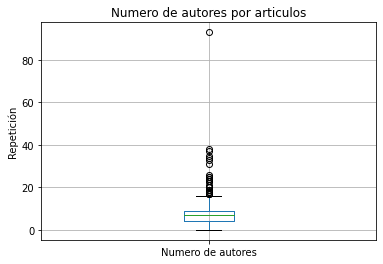

In [14]:
import matplotlib.pyplot as plot
boxplot = pub_authors[0:500].boxplot(column=["Numero de autores"])
plot.title("Numero de autores por articulos")
plot.ylabel("Repetición")

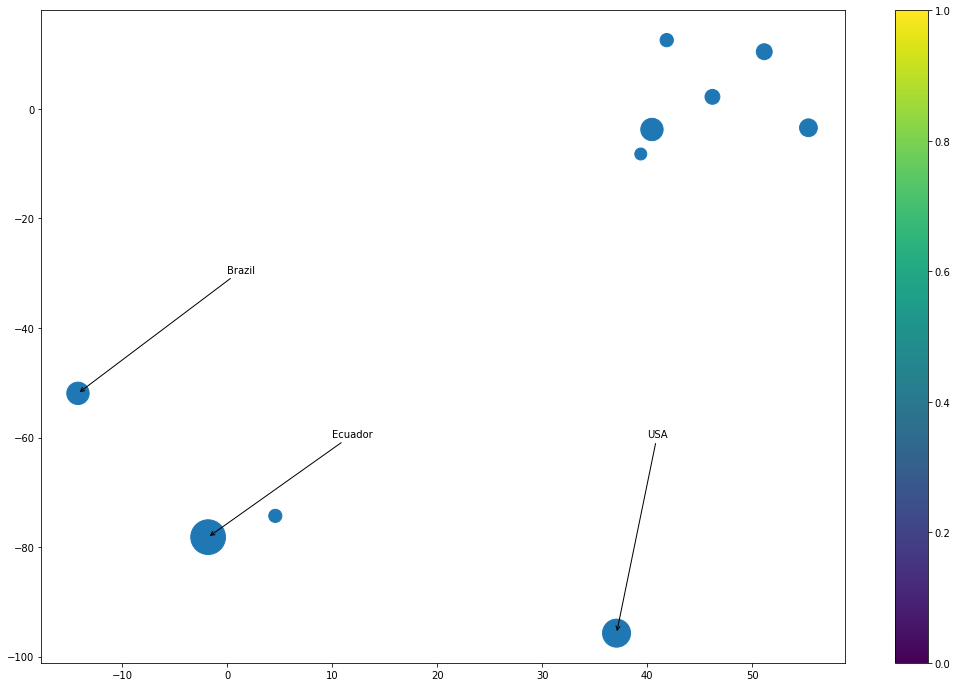

In [23]:
countries = countries.sort_values("numero de autores")
max_pais = (countries[104:])

lat = [39.399872, 4.570868, 41.87194, 46.227638, 51.165691, 55.378051, 
                40.463667, -14.235004, 37.09024, -1.831239  ]  ## una lista de latitud de los 10 primeros paises 
                 
long = [-8.224454, -74.297333, 12.56738, 2.213749, 10.451526, -3.435973,  
                 -3.74922, -51.92528, -95.712891, -78.183406]   ## una lista de longitud de los 10 primeros paises 
frecuencia = [143, 173, 177, 221, 253, 316, 499, 501, 784, 1206]  ## una lista de la frecuencia de los 10 primeros paises 

import matplotlib.pyplot as plot
%matplotlib inline

plot.scatter(lat, long, frecuencia) 
plot.colorbar()
ard = dict(arrowstyle="->")
plot.annotate("Ecuador", xy = (-1.831239, -78.183406 ), 
             xytext = (10,-60), arrowprops = ard) 
plot.annotate("USA", xy= (37.09024, -95.712891), 
            xytext = (40, -60), arrowprops = ard)
plot.annotate("Brazil", xy= (-14.235004, -51.92528), 
            xytext = (0, -30), arrowprops = ard)
params = plot.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plot.show()

## Ejercicio 5 [1 punto]

Interprete los resultados del **ejercicio 4**

### En el primer grafico que corresponde al histograma se puede observar que existe un aumento exponencial del numero de articulos desde el año 1975 hasta 2020, observando un importante conocimiento en el area de genomica en el Ecuador. 

### En el diagrama de cajas se puede observar que existe un promedio por numero de autores alrededor de 10, aunque existen algunos articulos que tienen hasta 80 autores, siendo valores atipicos que estan en el limite superior. 

### En el diagrama de puntos se puede observar a las tres primeras nacionalidades donde son los autores, siendo Ecuador, USA y Brazil la que mas frencuencia obtuvieron. 

### Escriba la respuesta del ejercicio 5


## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

In [27]:
### busqueda en el genbank kRas oncogene 
from Bio import Phylo
from Bio import SeqIO
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import Entrez
from Bio import SeqIO
from Bio import GenBank 
import csv 
import re 
## gen buscado microsatelites
with open("sequence.seq", errors="ignore") as f: ## abrimos el archivo descargado access list 
    texto = f.read()
accession = texto.split("\n") ## generamos una lista con tolos los access list 
lista = []
Entrez.email="jhanito10@gmail.com"
archivo = open("10_secuencias.txt", "w")
for i in accession[0:10]: 
    handle=Entrez.efetch(db="nuccore", id=i, rettype="fasta")
    archivo.write(handle.read())  ### escribimos un archivo donde se guardaran las 10 primeras secuencias 
with open("alineacion.txt", "r") as f:  ###realizaremos un alineamiento en muscle y lo cargamos para crear el arbol filogenetico
    alignment = AlignIO.read(f, "clustal")
calculator = DistanceCalculator("identity")
distance_matriz = calculator.get_distance(alignment)
constructor = DistanceTreeConstructor(calculator)
tree = constructor.build_tree(alignment)
tree.rooted = True 
Phylo.draw_ascii(tree)


                                            ___________ XM_012640966.1
             ______________________________|
        ____|                              |__________________ XM_009906003.1
       |    |
       |    |___________________________ XM_015407158.1
    ___|
   |   |                                 __ MZ068305.1
   |   |             ___________________|
   |   |____________|                   | MZ068306.1
  _|                |
 | |                |________ MZ068304.1
 | |
 | |                        , MZ068311.1
_| |________________________|
 |                          |_ MZ068312.1
 |
 | MZ068301.1
 |
 |_ MZ068300.1



**Escriba aquí la interpretación del árbol**

### En el arbol se pueden evidenciar 7 taxones: 3 taxos presentan dos secuencias y 4 taxones presentan una sola secuencia, existen dos secuencias que presentan una menor relacion que las demas, que son MZ068301.1 y MZ068300.1

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado .....  
```

<img src=pregunta_1.PNG width=800 height=240 />
<img src=pregunta_2.PNG width=800 height=240 />
<img src=pregunta_3.PNG width=800 height=240 />
<img src=pregunta_4.PNG width=800 height=240 />
<img src=pregunta_5.PNG width=800 height=240 />
<img src=pregunta_6.PNG width=800 height=240 />
<img src=pregunta_7.PNG width=800 height=240 />